In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import torch
from sklearn.model_selection import train_test_split
from pathlib import Path

In [ ]:
res_dir = Path('f_opt').joinpath('rosenbrock')
res_dir.mkdir(exist_ok=True,parents=True)

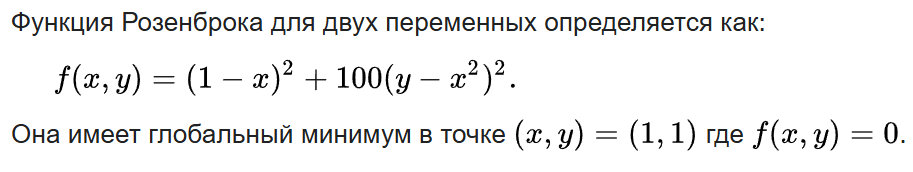

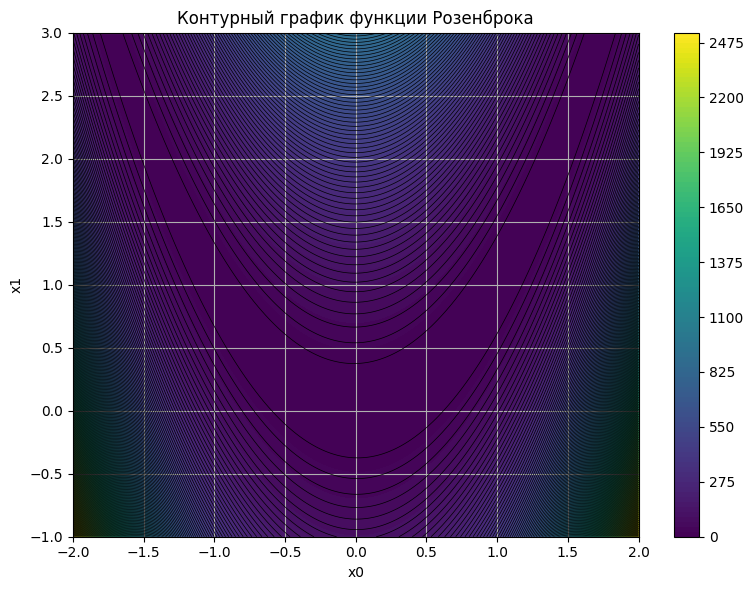

In [8]:
N = 1000
x1 = np.linspace(-2, 2, N)     # диапазон по x0
x2 = np.linspace(-1, 3, N)     # диапазон по x1

X0, X1 = np.meshgrid(x1, x2)   # сетка для контуров

# === 2-D функция ===
Y = np.zeros_like(X0)          # на всякий случай, как у вас
Y[:] = np.nan
Y = (1 - X0) ** 2 + 100 * (X1 - X0 ** 2) ** 2

# === 1-D срез (если понадобится) ===
y = np.zeros_like(x1)
y[:] = np.nan
y = (1 - x1) ** 2 + 100 * (x2 - x1 ** 2) ** 2   # broadcast-срез

# === Визуализация ===
plt.figure(figsize=(8, 6))
contour = plt.contourf(X0, X1, Y, levels=100, cmap='viridis')     # заливка
plt.contour(X0, X1, Y, levels=200, colors='black', linewidths=0.5)  # линии
plt.colorbar(contour)

plt.title("Контурный график функции Розенброка")
plt.xlabel("x0")
plt.ylabel("x1")
plt.grid(True)
plt.tight_layout()
plt.show()

# Сохранить картинку (если нужен файл)
# plt.savefig(res_dir.joinpath('rosenbrock_contour.png'))

In [ ]:
df = pd.DataFrame({'x1': x1,'x2':x2,'y':y})
display(df)

df.to_csv(res_dir.joinpath('rosenbrock_ds_0.csv'))

,x1,x2,y
0,-2.000000,-1.000000,2509.000000
1,-1.995996,-0.995996,2489.012020
2,-1.991992,-0.991992,2469.135912
3,-1.987988,-0.987988,2449.371291
4,-1.983984,-0.983984,2429.717773
...,...,...,...
995,1.983984,2.983984,91.638321
996,1.987988,2.987988,93.926592
997,1.991992,2.991992,96.249477
998,1.995996,2.995996,98.607202
